#### ML Project
##### Author: Swj
##### Last Updated: 2024.1.4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import re
import jieba
from wordcloud import WordCloud

In [2]:
df = pd.read_excel('./training_dataset.xls')
df

,Time Stamp,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.0018 23:00,0.2,775.0,775.5,0.2,85.0,从北方吹来的风,0,NaN,5.0,...,NaN,NaN,3,-2.0,无降水,12.0,NaN,NaN,NaN,NaN
1,31.12.0018 20:00,2.0,774.8,775.3,0.8,75.0,从东方吹来的风,1,NaN,NaN,...,NaN,NaN,4.5,-2.1,无降水,12.0,NaN,NaN,NaN,NaN
2,31.12.0018 17:00,7.7,774.0,774.4,-0.1,41.0,从东方吹来的风,1,NaN,NaN,...,NaN,NaN,7,-4.7,无降水,12.0,NaN,NaN,NaN,NaN
3,31.12.0018 14:00,9.6,774.1,774.6,-1.8,28.0,从东北方吹来的风,2,NaN,5.0,...,NaN,NaN,9,-8.0,无降水,12.0,NaN,NaN,NaN,NaN
4,31.12.0018 11:00,7.6,775.9,776.4,0.0,38.0,从东方吹来的风,2,NaN,NaN,...,NaN,NaN,8,-5.8,无降水,12.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40769,02.02.0001 08:00,-1.1,770.2,771.2,NaN,59.0,从西方吹来的风,2,NaN,NaN,...,NaN,浓密的卷云，呈散片状或扭曲的斜坡状，其数量通常不会增加，有时似乎只剩下积雨云的顶部；或塔状卷...,18,-8.1,NaN,NaN,地表潮湿,NaN,NaN,NaN
40770,02.02.0001 02:00,-1.6,769.6,770.6,NaN,52.0,从西方吹来的风,2,NaN,NaN,...,在同一高度上的透光高积云,浓密的卷云，呈散片状或扭曲的斜坡状，其数量通常不会增加，有时似乎只剩下积雨云的顶部；或塔状卷...,20,-10.2,NaN,NaN,NaN,NaN,NaN,NaN
40771,01.02.0001 20:00,-0.2,769.6,770.6,NaN,43.0,从西北方吹来的风,3,NaN,NaN,...,NaN,浓密的卷云，呈散片状或扭曲的斜坡状，其数量通常不会增加，有时似乎只剩下积雨云的顶部；或塔状卷...,18,-11.3,NaN,NaN,NaN,NaN,NaN,NaN
40772,01.02.0001 14:00,1.8,767.7,768.6,NaN,32.0,从西北方吹来的风,5,NaN,NaN,...,NaN,浓密的卷云，呈散片状或扭曲的斜坡状，其数量通常不会增加，有时似乎只剩下积雨云的顶部；或塔状卷...,20,-13.1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40774 entries, 0 to 40773
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time Stamp  40774 non-null  object 
 1   T           40771 non-null  float64
 2   Po          40532 non-null  float64
 3   P           40539 non-null  float64
 4   Pa          27039 non-null  float64
 5   U           40769 non-null  float64
 6   DD          40774 non-null  object 
 7   Ff          40774 non-null  int64  
 8   ff10        0 non-null      float64
 9   ff3         7892 non-null   float64
 10  N           32383 non-null  object 
 11  WW          40774 non-null  object 
 12  W2          14342 non-null  object 
 13  Tn          14071 non-null  float64
 14  Tx          13403 non-null  float64
 15  Cl          7751 non-null   object 
 16  Nh          19874 non-null  object 
 17  H           29476 non-null  object 
 18  Cm          8109 non-null   object 
 19  Ch          6772 non-null

In [4]:
df1 = df[['T', 'Po', 'P', 'Pa', 'U', 'ff10', 'ff3', 'Tn', 'Tx', 'Td', 'tR']]
df1.describe()

,T,Po,P,Pa,U,ff10,ff3,Tn,Tx,Td,tR
count,40771.000000,40532.000000,40539.000000,27039.000000,40769.000000,0.0,7892.000000,14071.000000,13403.000000,40772.000000,14064.000000
mean,17.561713,762.006859,762.621505,0.001860,71.918786,NaN,7.995312,14.458233,21.618772,11.938833,9.090870
std,9.162695,6.876098,6.888671,0.907696,17.476032,NaN,2.843505,9.048683,9.131496,9.662358,3.003848
min,-7.600000,734.500000,734.900000,-12.900000,12.000000,NaN,1.000000,-7.800000,-4.700000,-22.000000,6.000000
25%,9.800000,756.200000,756.800000,-0.600000,61.000000,NaN,6.000000,7.000000,13.800000,4.400000,6.000000
50%,18.400000,762.100000,762.700000,0.000000,74.000000,NaN,8.000000,14.800000,22.200000,12.600000,12.000000
75%,25.000000,767.400000,768.000000,0.600000,86.000000,NaN,9.000000,22.400000,29.000000,20.600000,12.000000
max,39.400000,781.100000,781.800000,14.800000,100.000000,NaN,26.000000,32.000000,40.000000,28.700000,24.000000


In [5]:
df1.isna().sum()

T           3
Po        242
P         235
Pa      13735
U           5
ff10    40774
ff3     32882
Tn      26703
Tx      27371
Td          2
tR      26710
dtype: int64

In [6]:
df1[df1['Tn'] == min(df1.Tn)]

,T,Po,P,Pa,U,ff10,ff3,Tn,Tx,Td,tR
5761,-4.6,773.8,774.5,NaN,46.0,NaN,11.0,-7.8,-1.1,-14.5,6.0
5763,-3.6,773.5,774.1,0.3,36.0,NaN,11.0,-7.8,-1.1,-16.5,12.0
5764,-2.1,773.2,773.9,-0.3,24.0,NaN,11.0,-7.8,-1.1,-20.0,12.0
5765,-1.7,773.5,774.2,-2.1,21.0,NaN,11.0,-7.8,-1.6,-21.2,12.0
5766,-3.7,775.6,776.3,-0.5,30.0,NaN,12.0,-7.8,-3.7,-18.8,12.0
5767,-7.1,776.1,776.8,0.0,35.0,NaN,12.0,-7.8,NaN,-20.0,12.0
5768,-7.6,776.1,776.8,-0.2,36.0,NaN,12.0,-7.8,NaN,-20.1,12.0
20238,-5.4,779.5,780.2,-1.3,31.0,NaN,18.0,-7.8,NaN,-19.9,NaN


In [7]:
df1[df1['Tx'] == max(df1.Tn)]

,T,Po,P,Pa,U,ff10,ff3,Tn,Tx,Td,tR
996,31.8,758.0,758.4,0.1,62.0,NaN,7.0,24.7,32.0,23.6,12.0
1659,26.2,755.6,756.0,0.1,54.0,NaN,9.0,21.6,32.0,16.2,12.0
1661,22.6,755.2,755.5,1.5,82.0,NaN,8.0,21.6,32.0,19.4,12.0
1662,21.8,753.7,754.0,1.4,93.0,NaN,8.0,21.1,32.0,20.6,12.0
1663,23.3,752.3,752.7,0.2,91.0,NaN,8.0,21.1,32.0,21.7,12.0
1664,25.3,752.1,752.5,1.1,85.0,NaN,8.0,21.1,32.0,22.6,12.0
1665,28.8,751.0,751.3,1.3,53.0,NaN,8.0,21.1,32.0,18.3,12.0
1666,31.4,749.7,750.1,-1.2,44.0,NaN,7.0,21.1,32.0,17.7,12.0
2108,30.6,756.7,757.1,-0.3,43.0,NaN,5.0,16.4,32.0,16.6,12.0
2109,24.4,757.0,757.4,0.8,69.0,NaN,4.0,16.4,32.0,18.3,12.0


<Axes: xlabel='Tx', ylabel='Count'>

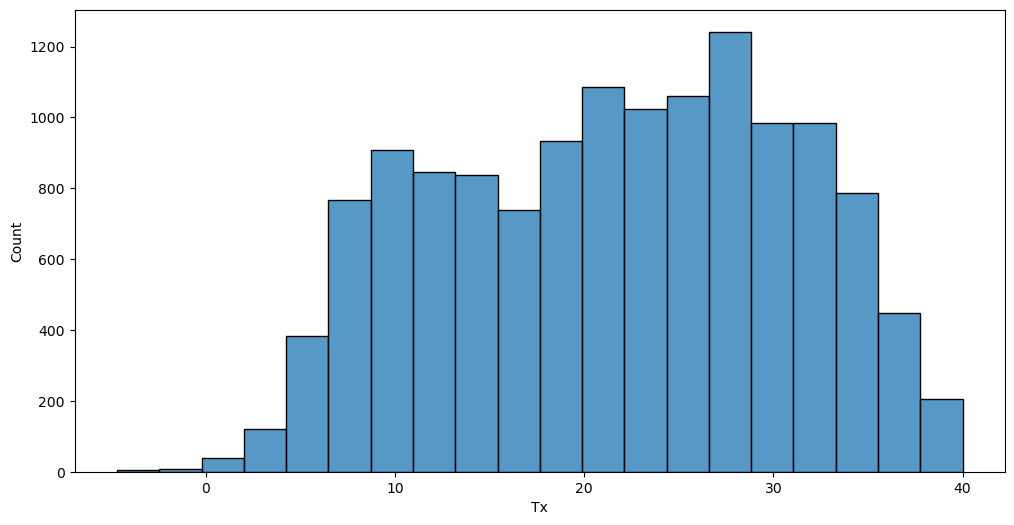

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x=df.Tx, bins=20)

<Axes: xlabel='Tn', ylabel='Count'>

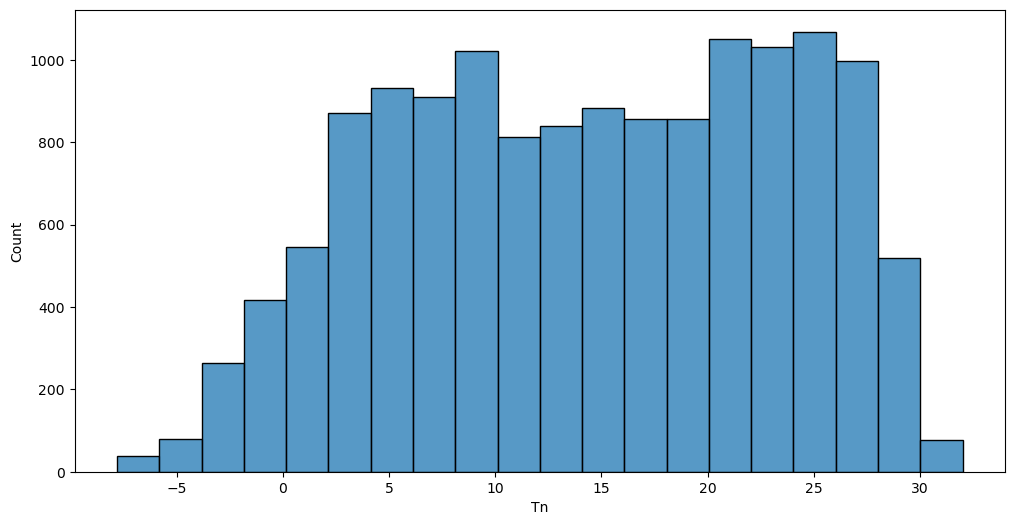

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x=df.Tn, bins=20)

In [10]:
from datetime import datetime

df['year'] = 0
df['month'] = 0
df['day'] = 0
df['hour'] = 0

def parse_timestamp(timestamp):
    date_format = "%d.%m.%Y %H:%M"
    parsed_date = datetime.strptime(timestamp, date_format)
    return {'year': parsed_date.year, 'month': parsed_date.month, 'day': parsed_date.day, 'hour': parsed_date.hour}

df[['year', 'month', 'day', 'hour']] = df['Time Stamp'].apply(parse_timestamp).apply(pd.Series)
df[['year', 'month', 'day', 'hour']]

,year,month,day,hour
0,18,12,31,23
1,18,12,31,20
2,18,12,31,17
3,18,12,31,14
4,18,12,31,11
...,...,...,...,...
40769,1,2,2,8
40770,1,2,2,2
40771,1,2,1,20
40772,1,2,1,14


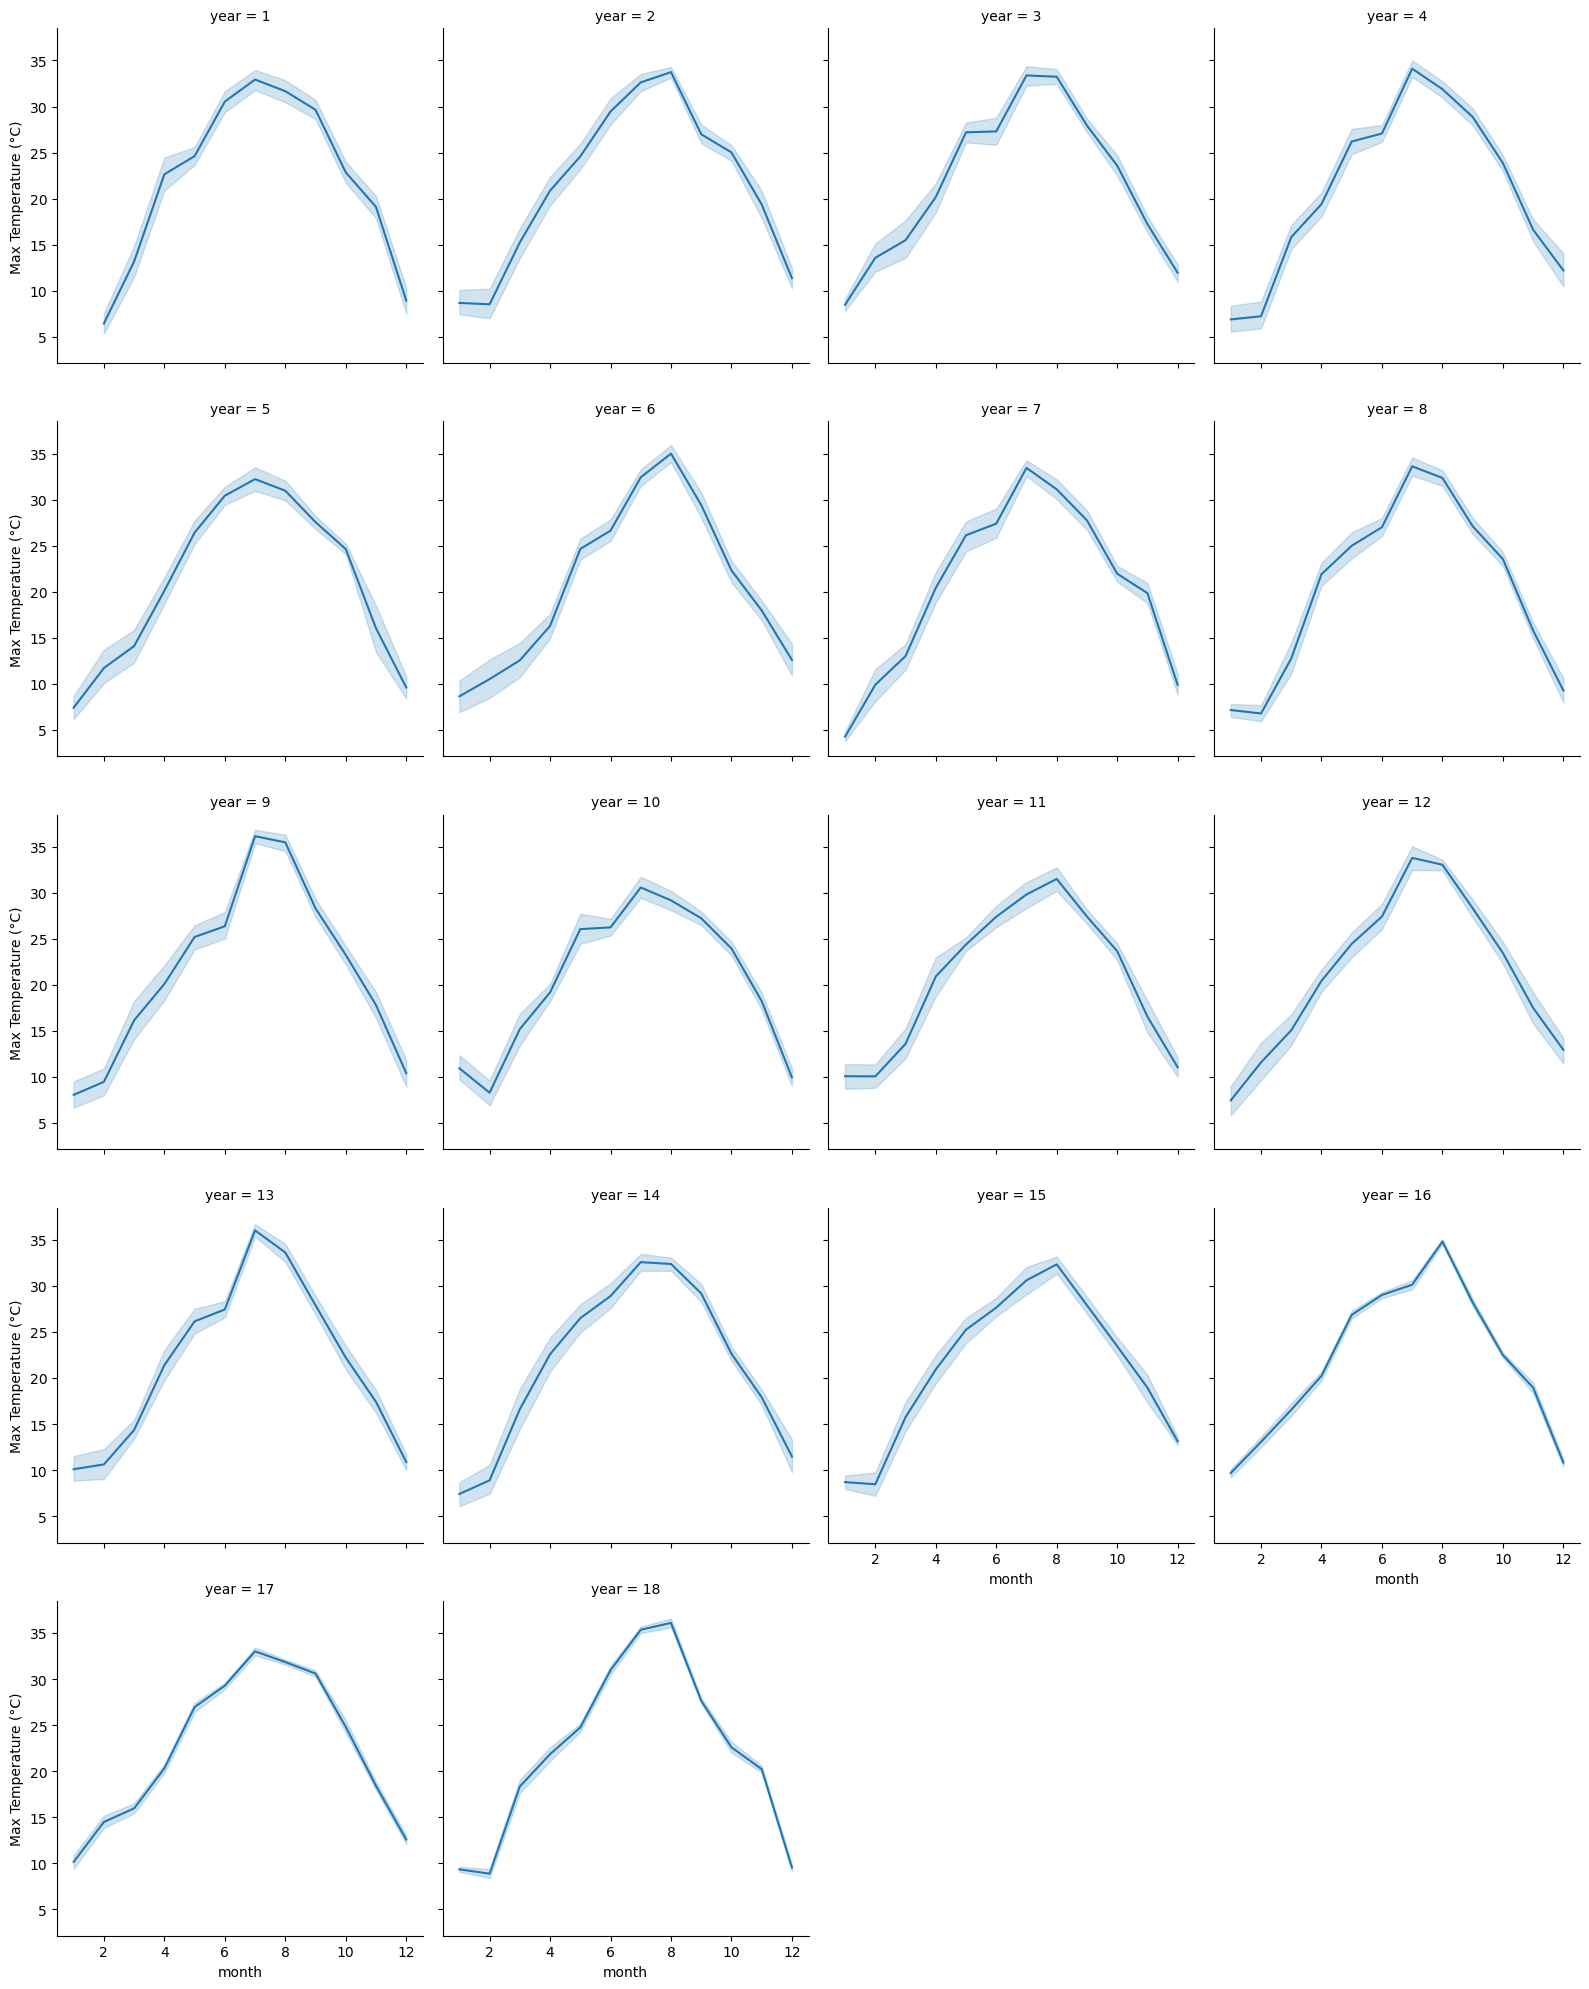

In [11]:
df2 = df.dropna(subset=['Tx'])
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'Tx')
g.set_axis_labels('month', 'Max Temperature (°C)')
g.set_titles(col_template="year = {col_name}")
plt.show()

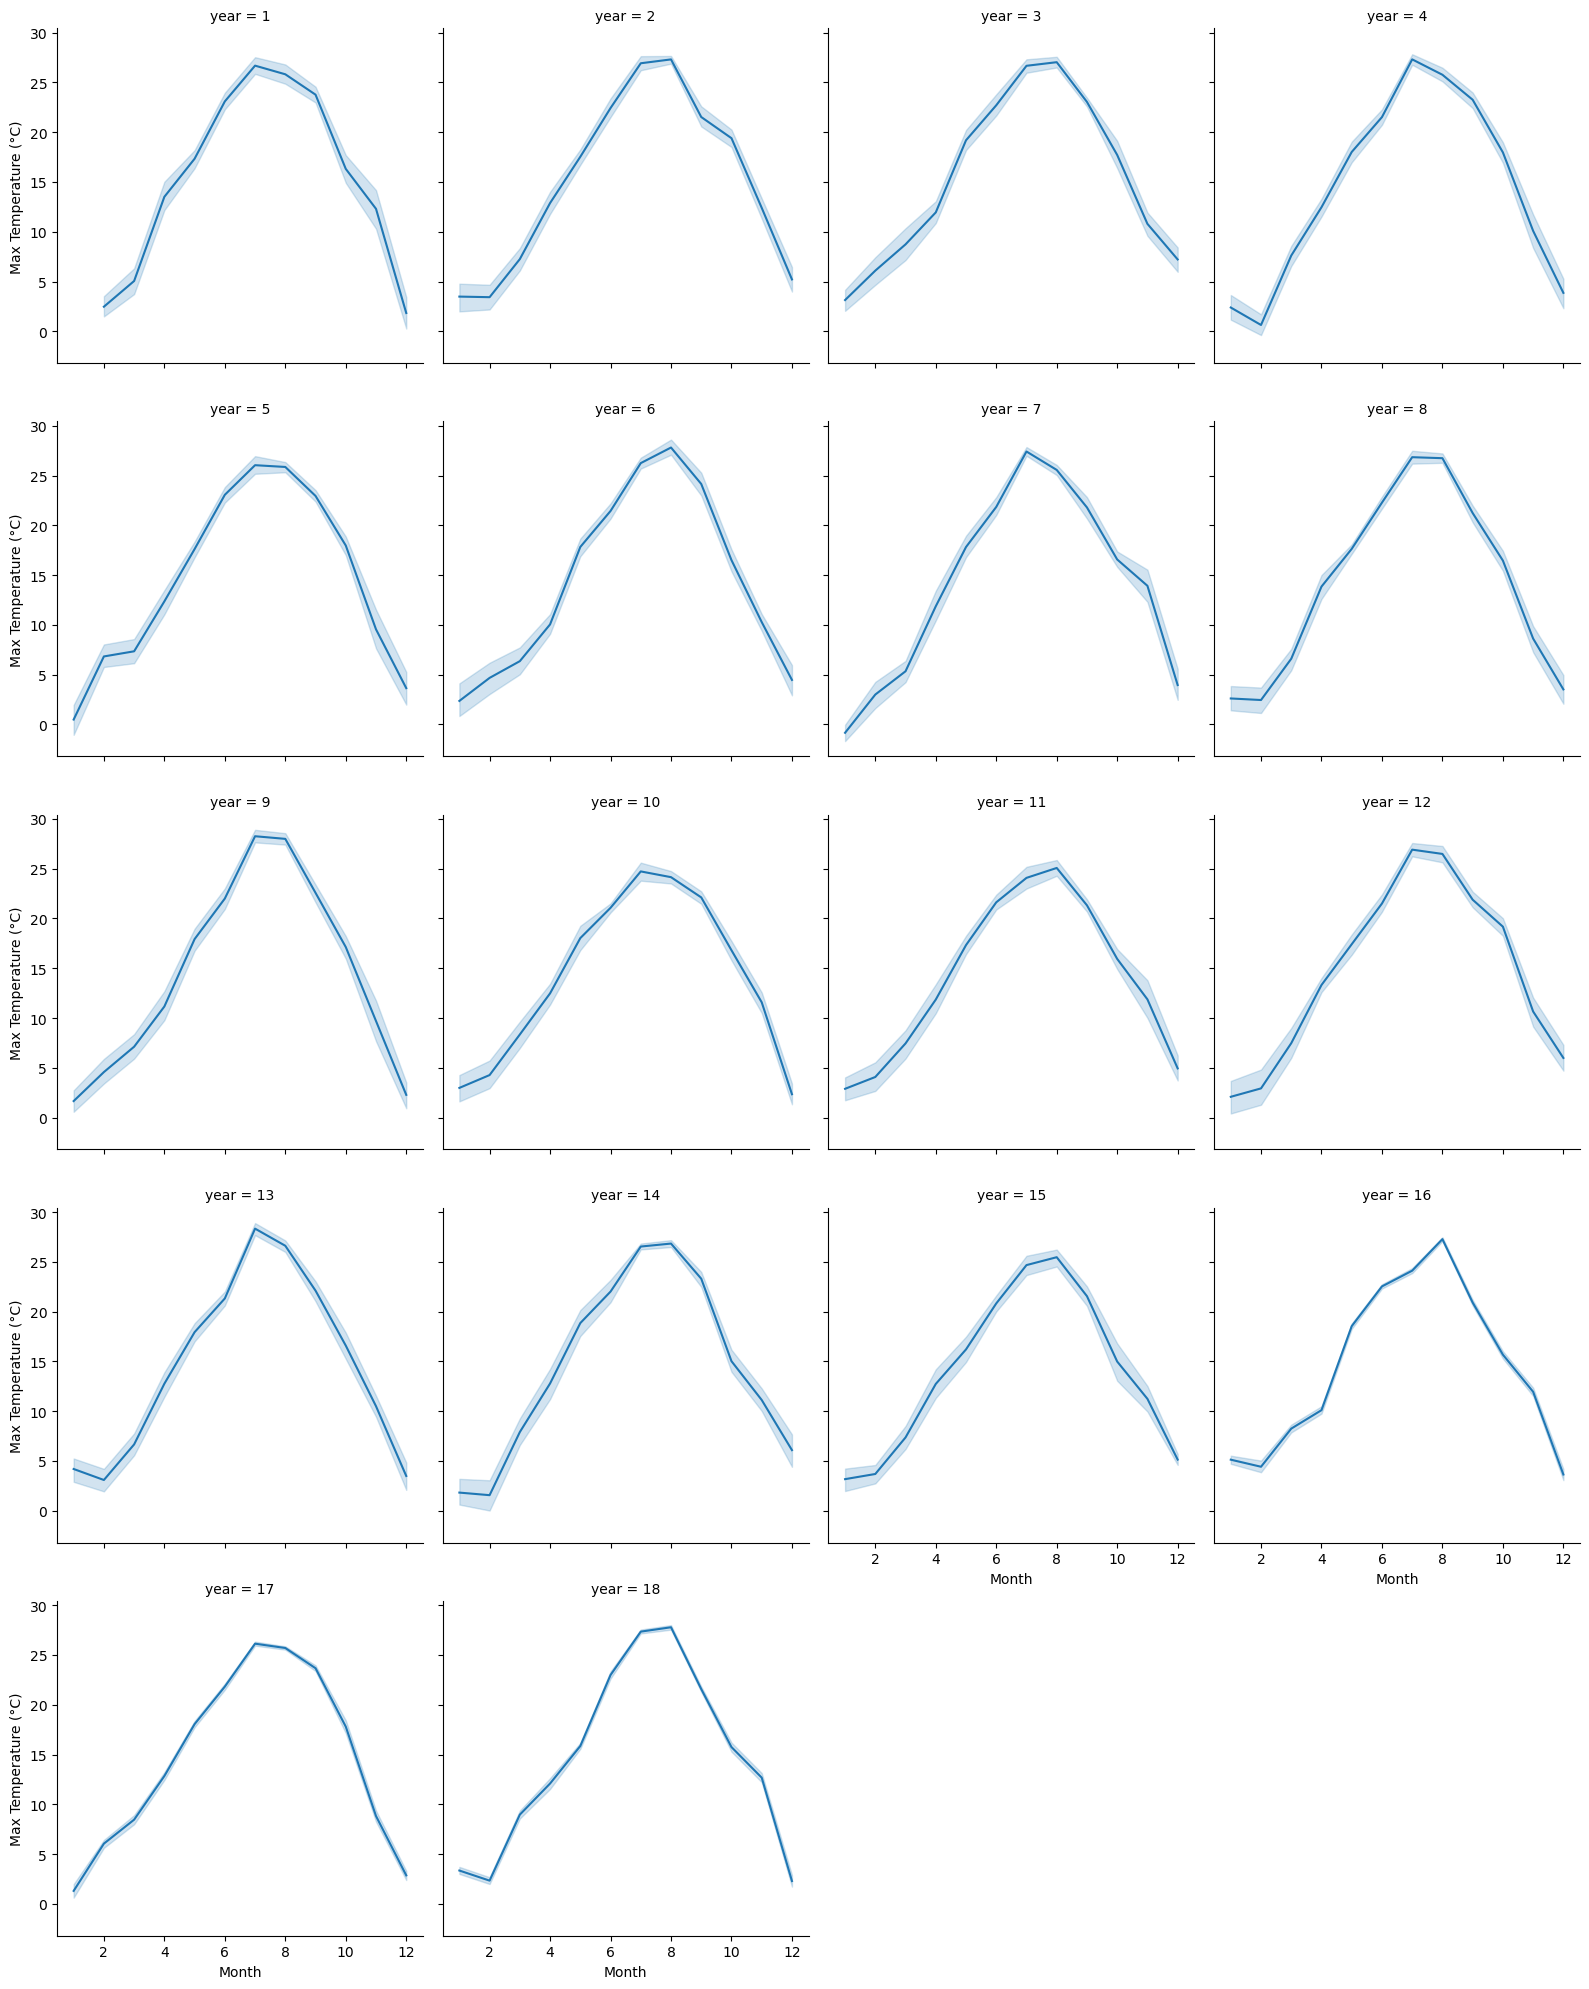

In [12]:
df3 = df.dropna(subset=['Tn'])
g = sns.FacetGrid(df3, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'Tn')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="year = {col_name}")
plt.show()

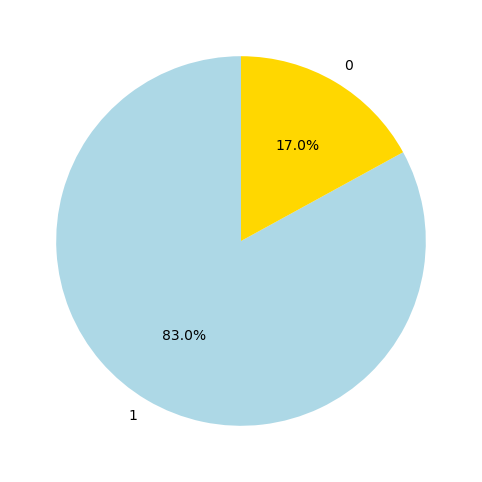

In [13]:
df['RRR'] = df['RRR'].apply(lambda x: 0 if x == "无降水" else 1)
x = df.RRR.value_counts()
plt.figure(figsize=(12, 6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold'])
plt.show()

<Axes: >

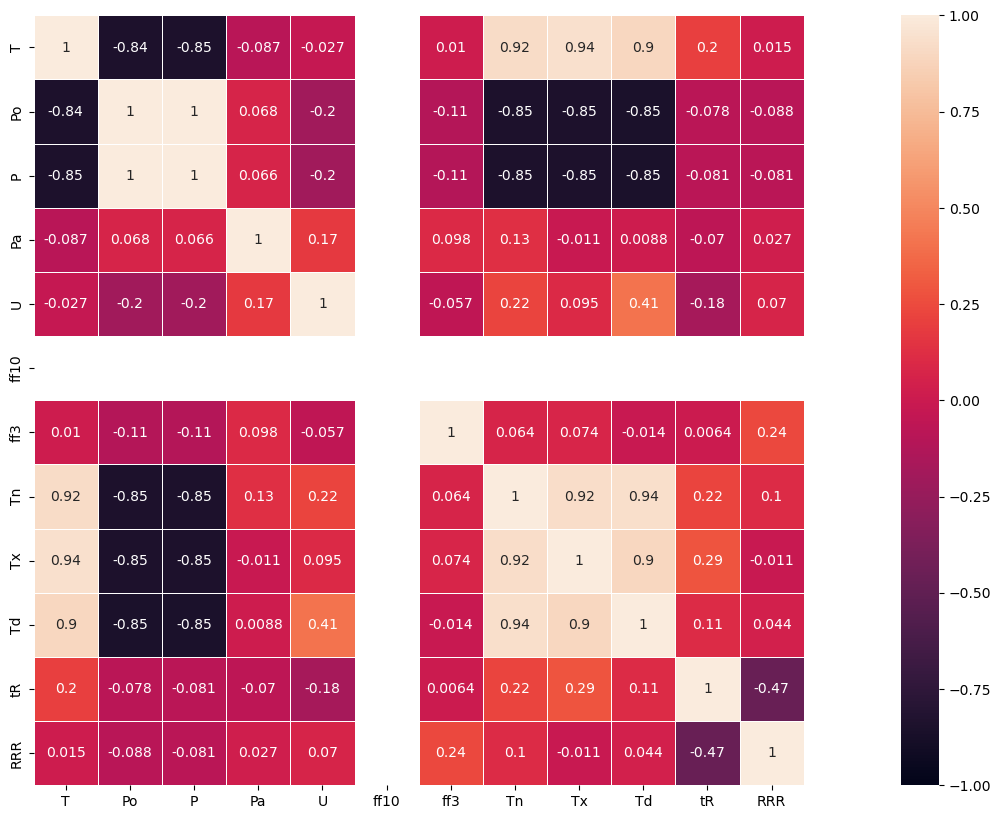

In [14]:
df4 = df[['T', 'Po', 'P', 'Pa', 'U', 'ff10', 'ff3', 'Tn', 'Tx', 'Td', 'tR', 'RRR']]
plt.figure(figsize=(25, 10))
sns.heatmap(df4.corr(),linewidths=0.5, vmax=1.0, vmin = -1, square=True, linecolor='white', annot=True)

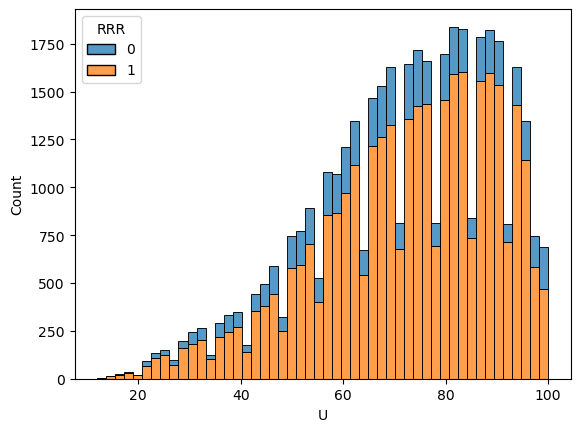

In [15]:
sns.histplot(data=df, x='U', hue='RRR', multiple='stack', bins=50)
plt.xlabel('U')
plt.ylabel('Count')
plt.show()

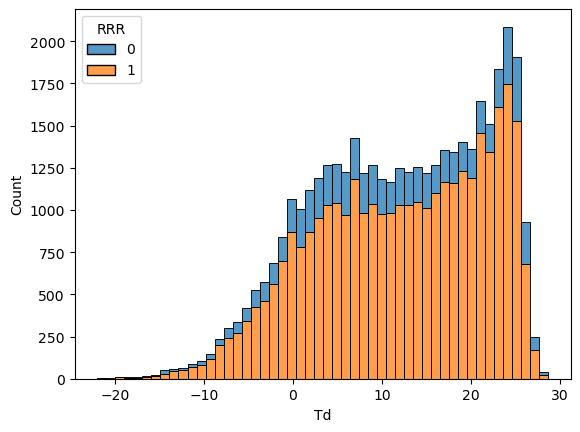

In [16]:
sns.histplot(data=df, x='Td', hue='RRR', multiple='stack', bins=50)
plt.xlabel('Td')
plt.ylabel('Count')
plt.show()

C:\Users\shenw\AppData\Local\Temp\ipykernel_5476\3031965306.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


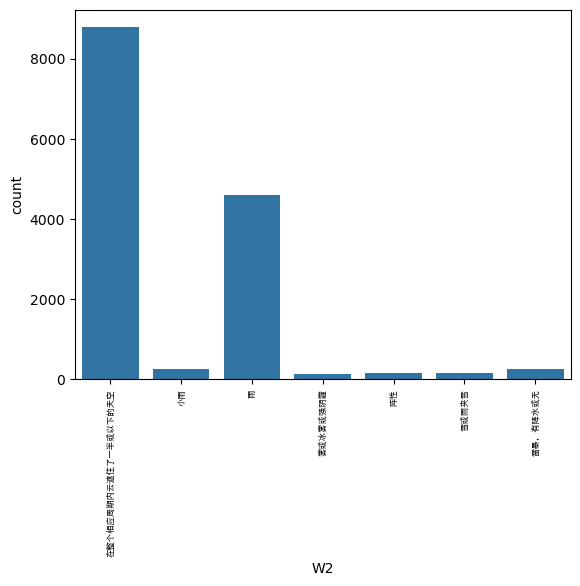

W2
在整个相应周期内云遮住了一半或以下的天空    0.527041
小雨                      0.973684
阵性                      1.000000
雨                       0.998911
雪或雨夹雪                   1.000000
雷暴，有降水或无                1.000000
雾或冰雾或强阴霾                0.949640
Name: RRR, dtype: float64


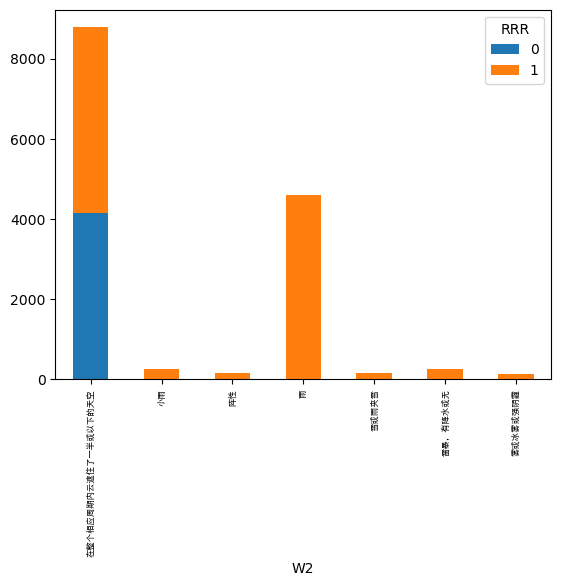

In [17]:
font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = FontProperties(fname=font_path, size=6)

ax1 = sns.countplot(x='W2', data=df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.xticks(fontproperties=font_prop)
plt.show()


avg_precipitation = df.groupby('W2')['RRR'].mean()
print(avg_precipitation)

df_grouped = df.groupby(['W2', 'RRR']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('W2')
plt.xticks(fontproperties=font_prop)
plt.show()


C:\Users\shenw\AppData\Local\Temp\ipykernel_5476\3837912974.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


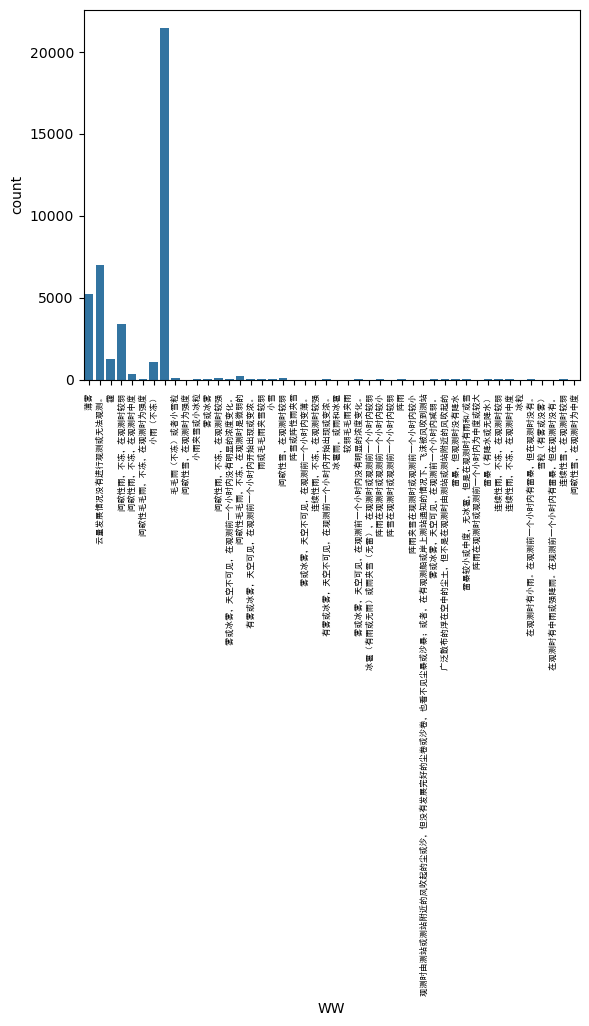

WW
                                                                             0.934853
云量发展情况没有进行观测或无法观测。                                                           0.356675
冰粒                                                                           1.000000
冰雹雨，或雨和冰雹                                                                    1.000000
冰雹（有雨或无雨）或雨夹雪（无雷），在观测时或观测前一个小时内较弱                                            1.000000
在观测时有中雨或强降雨。在观测前一个小时内有雷暴，但在观测时没有。                                            1.000000
在观测时有小雨。在观测前一个小时内有雷暴，但在观测时没有。                                                1.000000
小雨夹雪或小冰粒                                                                     1.000000
小雨（不冻）                                                                       0.947761
小雪                                                                           0.909091
广泛散布的浮在空中的尘土，但不是在观测时由测站或测站附近的风吹起的                                            1.000000
有雾或冰雾，天空不可见，在观测前一个小时内开始出现或变浓。                      

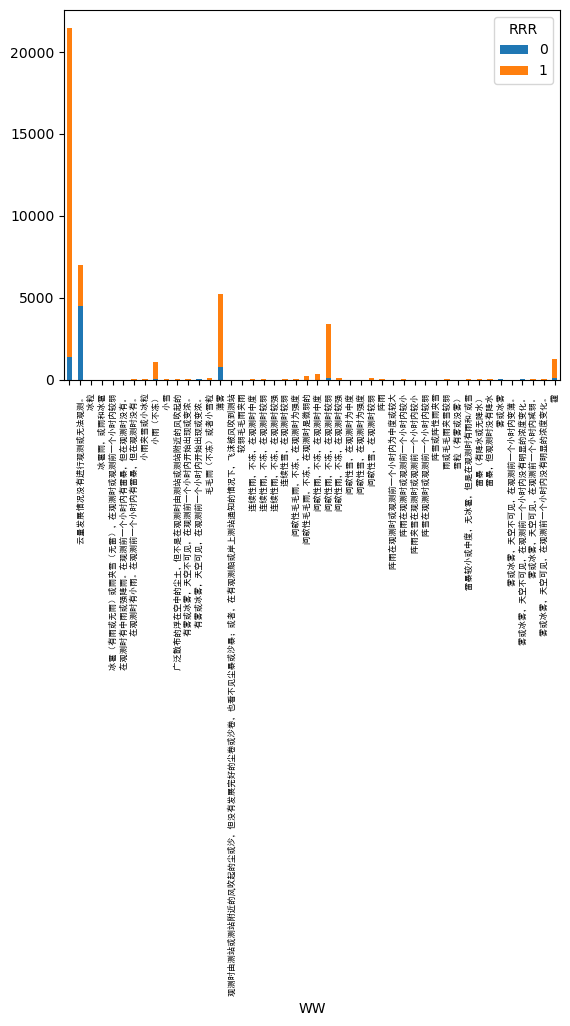

In [18]:
ax1 = sns.countplot(x='WW', data=df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.xticks(fontproperties=font_prop)
plt.show()

# ax2 = sns.boxplot(x='WW', y='RRR', data=df)
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# plt.xticks(fontproperties=font_prop)
# plt.show()

avg_precipitation = df.groupby('WW')['RRR'].mean()
print(avg_precipitation)

df_grouped = df.groupby(['WW', 'RRR']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('WW')
plt.xticks(fontproperties=font_prop)
plt.show()

C:\Users\shenw\AppData\Local\Temp\ipykernel_5476\2672293724.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


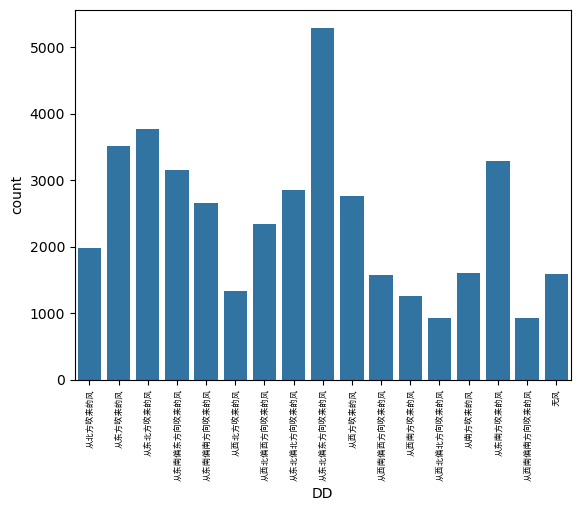

DD
从东北偏东方向吹来的风    0.850151
从东北偏北方向吹来的风    0.845992
从东北方吹来的风       0.852167
从东南偏东方向吹来的风    0.843393
从东南偏南方向吹来的风    0.814577
从东南方吹来的风       0.809930
从东方吹来的风        0.770394
从北方吹来的风        0.776880
从南方吹来的风        0.781172
从西北偏北方向吹来的风    0.896328
从西北偏西方向吹来的风    0.847501
从西北方吹来的风       0.851016
从西南偏南方向吹来的风    0.827549
从西南偏西方向吹来的风    0.856056
从西南方吹来的风       0.833067
从西方吹来的风        0.833695
无风             0.847553
Name: RRR, dtype: float64


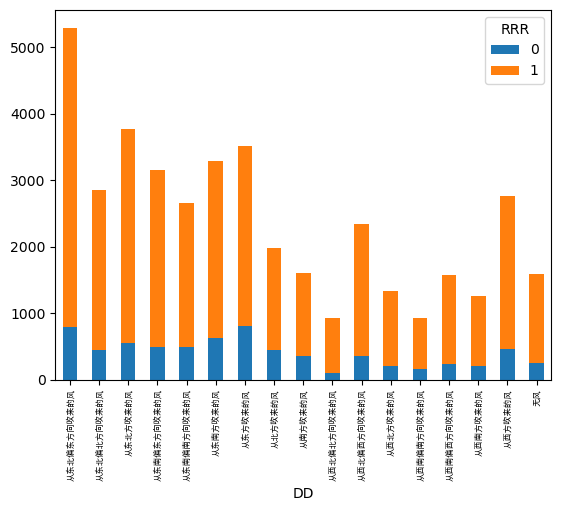

In [19]:
ax1 = sns.countplot(x='DD', data=df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.xticks(fontproperties=font_prop)
plt.show()

# ax2 = sns.boxplot(x='DD', y='RRR', data=df)
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# plt.xticks(fontproperties=font_prop)
# plt.show()

avg_precipitation = df.groupby('DD')['RRR'].mean()
print(avg_precipitation)

df_grouped = df.groupby(['DD', 'RRR']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('DD')
plt.xticks(fontproperties=font_prop)
plt.show()

C:\Users\shenw\AppData\Local\Temp\ipykernel_5476\939800307.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


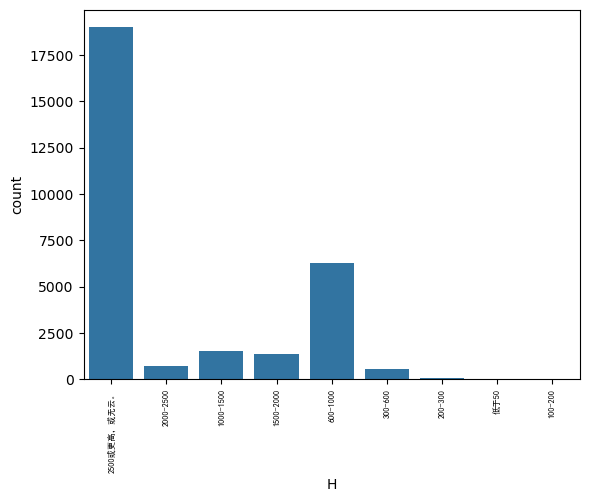

H
100-200         1.000000
1000-1500       0.963375
1500-2000       0.948793
200-300         1.000000
2000-2500       0.944828
2500或更高，或无云。    0.727646
300-600         0.994340
600-1000        0.985637
低于50            1.000000
Name: RRR, dtype: float64


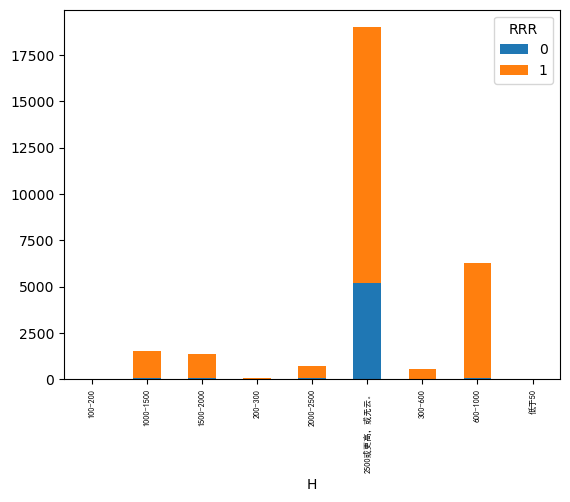

In [20]:
ax1 = sns.countplot(x='H', data=df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.xticks(fontproperties=font_prop)
plt.show()

# ax2 = sns.boxplot(x='H', y='RRR', data=df)
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# plt.xticks(fontproperties=font_prop)
# plt.show()

avg_precipitation = df.groupby('H')['RRR'].mean()
print(avg_precipitation)

df_grouped = df.groupby(['H', 'RRR']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('H')
plt.xticks(fontproperties=font_prop)
plt.show()

C:\Users\shenw\AppData\Local\Temp\ipykernel_5476\266648005.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


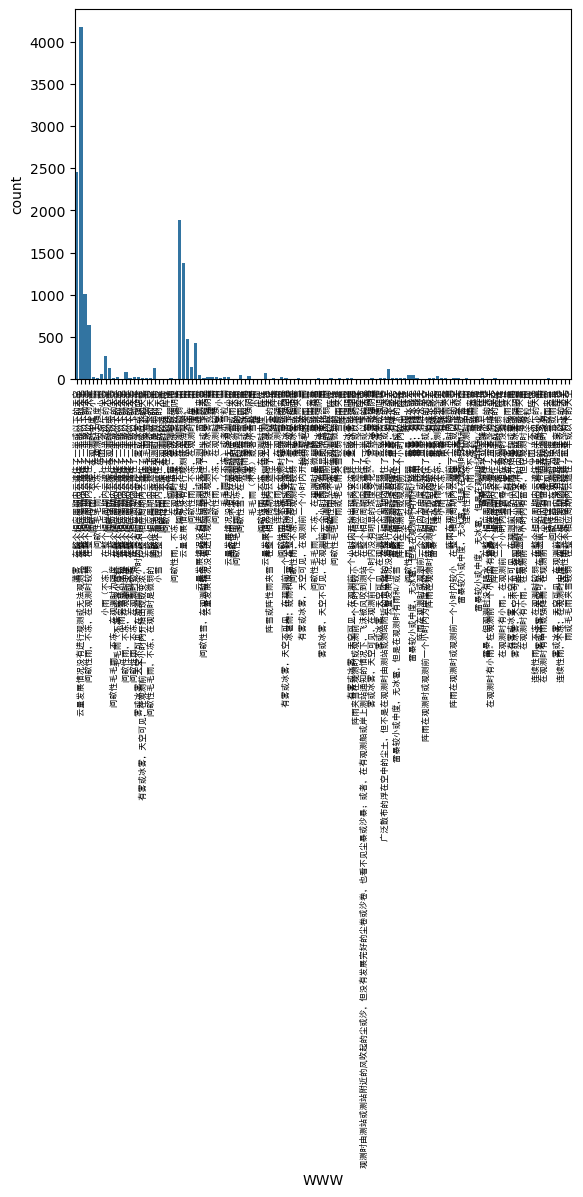

WWW
云量发展情况没有进行观测或无法观测。  在整个相应周期内云遮住了一半或以下的天空    0.156332
云量发展情况没有进行观测或无法观测。  小雨                      1.000000
云量发展情况没有进行观测或无法观测。  阵性                      1.000000
云量发展情况没有进行观测或无法观测。  雨                       0.998543
云量发展情况没有进行观测或无法观测。  雪或雨夹雪                   1.000000
                                              ...   
霾  小雨                                       1.000000
霾  阵性                                       1.000000
霾  雨                                        1.000000
霾  雪或雨夹雪                                    1.000000
霾  雾或冰雾或强阴霾                                 1.000000
Name: RRR, Length: 121, dtype: float64


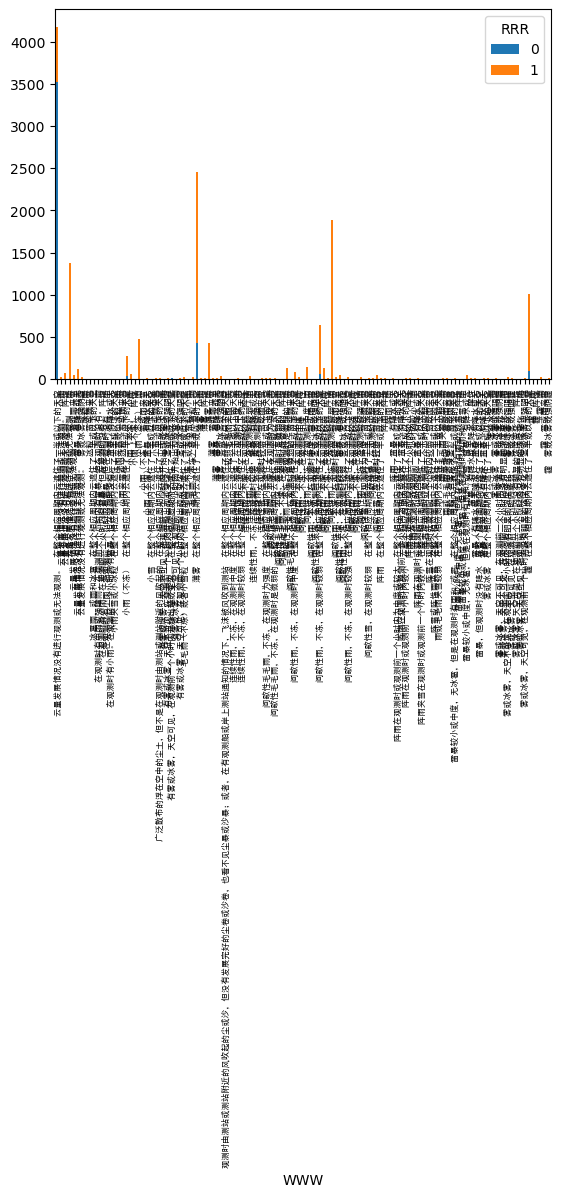

In [21]:
df['WWW'] = df['WW']+' '+df['W2']
ax1 = sns.countplot(x='WWW', data=df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.xticks(fontproperties=font_prop)
plt.show()

# ax2 = sns.boxplot(x='WWW', y='RRR', data=df)
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# plt.xticks(fontproperties=font_prop)
# plt.show()

avg_precipitation = df.groupby('WWW')['RRR'].mean()
print(avg_precipitation)

df_grouped = df.groupby(['WWW', 'RRR']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('WWW')
plt.xticks(fontproperties=font_prop)
plt.show()

得出的几个结论：
* 首先是Cell 14得到的热图，我们从中挑出和'RRR'正相关系数最高的两列，应该是'U'和'Td'，但是就Cell 15-16图上观察的结果而言，不是很想用这两列数据，因为准确率可能会比较低，反正不会是首选的数据，本来画图的目的是看能不能找出一个临界的露点温度和相对湿度能对是否降水造成很大影响，但是并没有出现这样的一个数据。从反相关系数而言就是'tR'了，但这个数据的信息量太少，本身应该就没什么用
* 所以后面就开始探索那些中文文本的列了，因为前面是把所有float类型的列单独拿出来看，既然不会作为首选，那就只有分析含有中文文本的列了，这里涉及到一个jieba库可能需要你们安装一下。
* 1. 在'W2'中我们发现，基本出现阵性、雨、雪或雨夹雪、雷暴，有降水或无这几个标签的时候降雨的可能性非常高，这里我的标准是在0.99以上<br>
  2. 其他几列我就不具体写了，可以往上翻，非图的部分，当然图更加直观。
* 剩下就是观察几列的耦合作用了，我第一个想到的就是'W2'和'WW'，毕竟这两列的实际意义都是天气，相关的程度应该比较高，但是由于'WW'类别有点多，导致最后的组合可能也比较多，所以这个也需要考虑。
* 其他数据的分析也可以采取上面分析的方法，float类型、中文文本和多列耦合的情况我都做了，比如说可以看看U、Td、ff3这三列的耦合关系。 *最后给我们提供的思路是，我们得好好利用那些中文文本，对最后模型的准确率影响非常大。 

